### Compreendendo os objetivos

<img src="/notebooks/img/houses-prices.png" alt="Imagem do houses Price" width="400">

**Objetivos**

Precisamos prever o valor dos preços com base nas informações das casas. Ou seja, sua função é prever o preço de venda de cada casa. Para cada ID no conjunto de teste, você deve prever o valor da variável SalePrice. 

Isso vai ajudar pessoas que querem vender suas casas e identificarem os preços com base nas características que serão informadas a uma corretora de imóveis.

**Habilidades práticas**

- Engenharia de recursos criativos
- Técnicas avançadas de regressão, como floresta aleatória e aumento de gradiente

**Métrica**

As propostas são avaliadas com base na Raiz do Erro Quadrático Médio (RMSE),  entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (A utilização de logaritmos significa que erros na previsão de casas caras e baratas afetarão o resultado igualmente.)

### Compreendendo os Dados

In [5]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_train = pd.read_csv('../data/train.csv')

#### Conhecendo o DataSet

In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
# Seleciona todas as colunas numéricas
numeric_features = df_train.select_dtypes(include=np.number).columns.tolist()

# Seleciona todas as colunas categóricas
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variáveis Numéricas:", numeric_features)
print("Variáveis Categóricas:", categorical_features)

Variáveis Numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Variáveis Categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firep

In [11]:
# Conta a quantidade de colunas de cada tipo
num_numeric = len(numeric_features)
num_categorical = len(categorical_features)

print(f"Total de colunas numéricas: {num_numeric}")
print(f"Total de colunas categóricas: {num_categorical}")

Total de colunas numéricas: 38
Total de colunas categóricas: 43


In [12]:
total_cols = num_numeric + num_categorical
print(f"Proporção de colunas numéricas: {num_numeric/total_cols:.2%}")
print(f"Proporção de colunas categóricas: {num_categorical/total_cols:.2%}")

Proporção de colunas numéricas: 46.91%
Proporção de colunas categóricas: 53.09%


In [13]:
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Criar um dicionário com a contagem de categorias únicas por coluna categórica
category_counts = {col: df_train[col].nunique(dropna=True) for col in categorical_features}

# Mostrar resultado
for col, count in category_counts.items():
    if count > 6:
        print(f"{col}: {count} categorias únicas")


Neighborhood: 25 categorias únicas
Condition1: 9 categorias únicas
Condition2: 8 categorias únicas
HouseStyle: 8 categorias únicas
RoofMatl: 8 categorias únicas
Exterior1st: 15 categorias únicas
Exterior2nd: 16 categorias únicas
Functional: 7 categorias únicas
SaleType: 9 categorias únicas


#### Visualizando os Dados

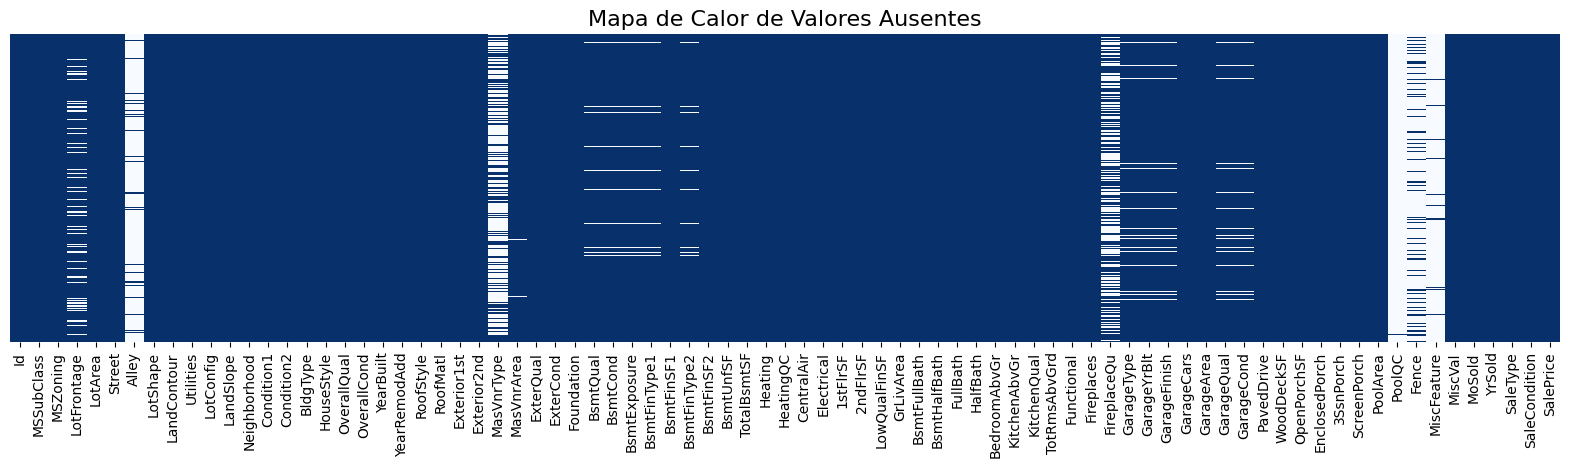

In [14]:
# Visualizando valores ausentes
import seaborn as sns
plt.figure(figsize=(20, 4))
sns.heatmap(df_train.isnull(), cbar=False, cmap='Blues_r', yticklabels=False)
plt.title('Mapa de Calor de Valores Ausentes', fontsize=16)
plt.show()

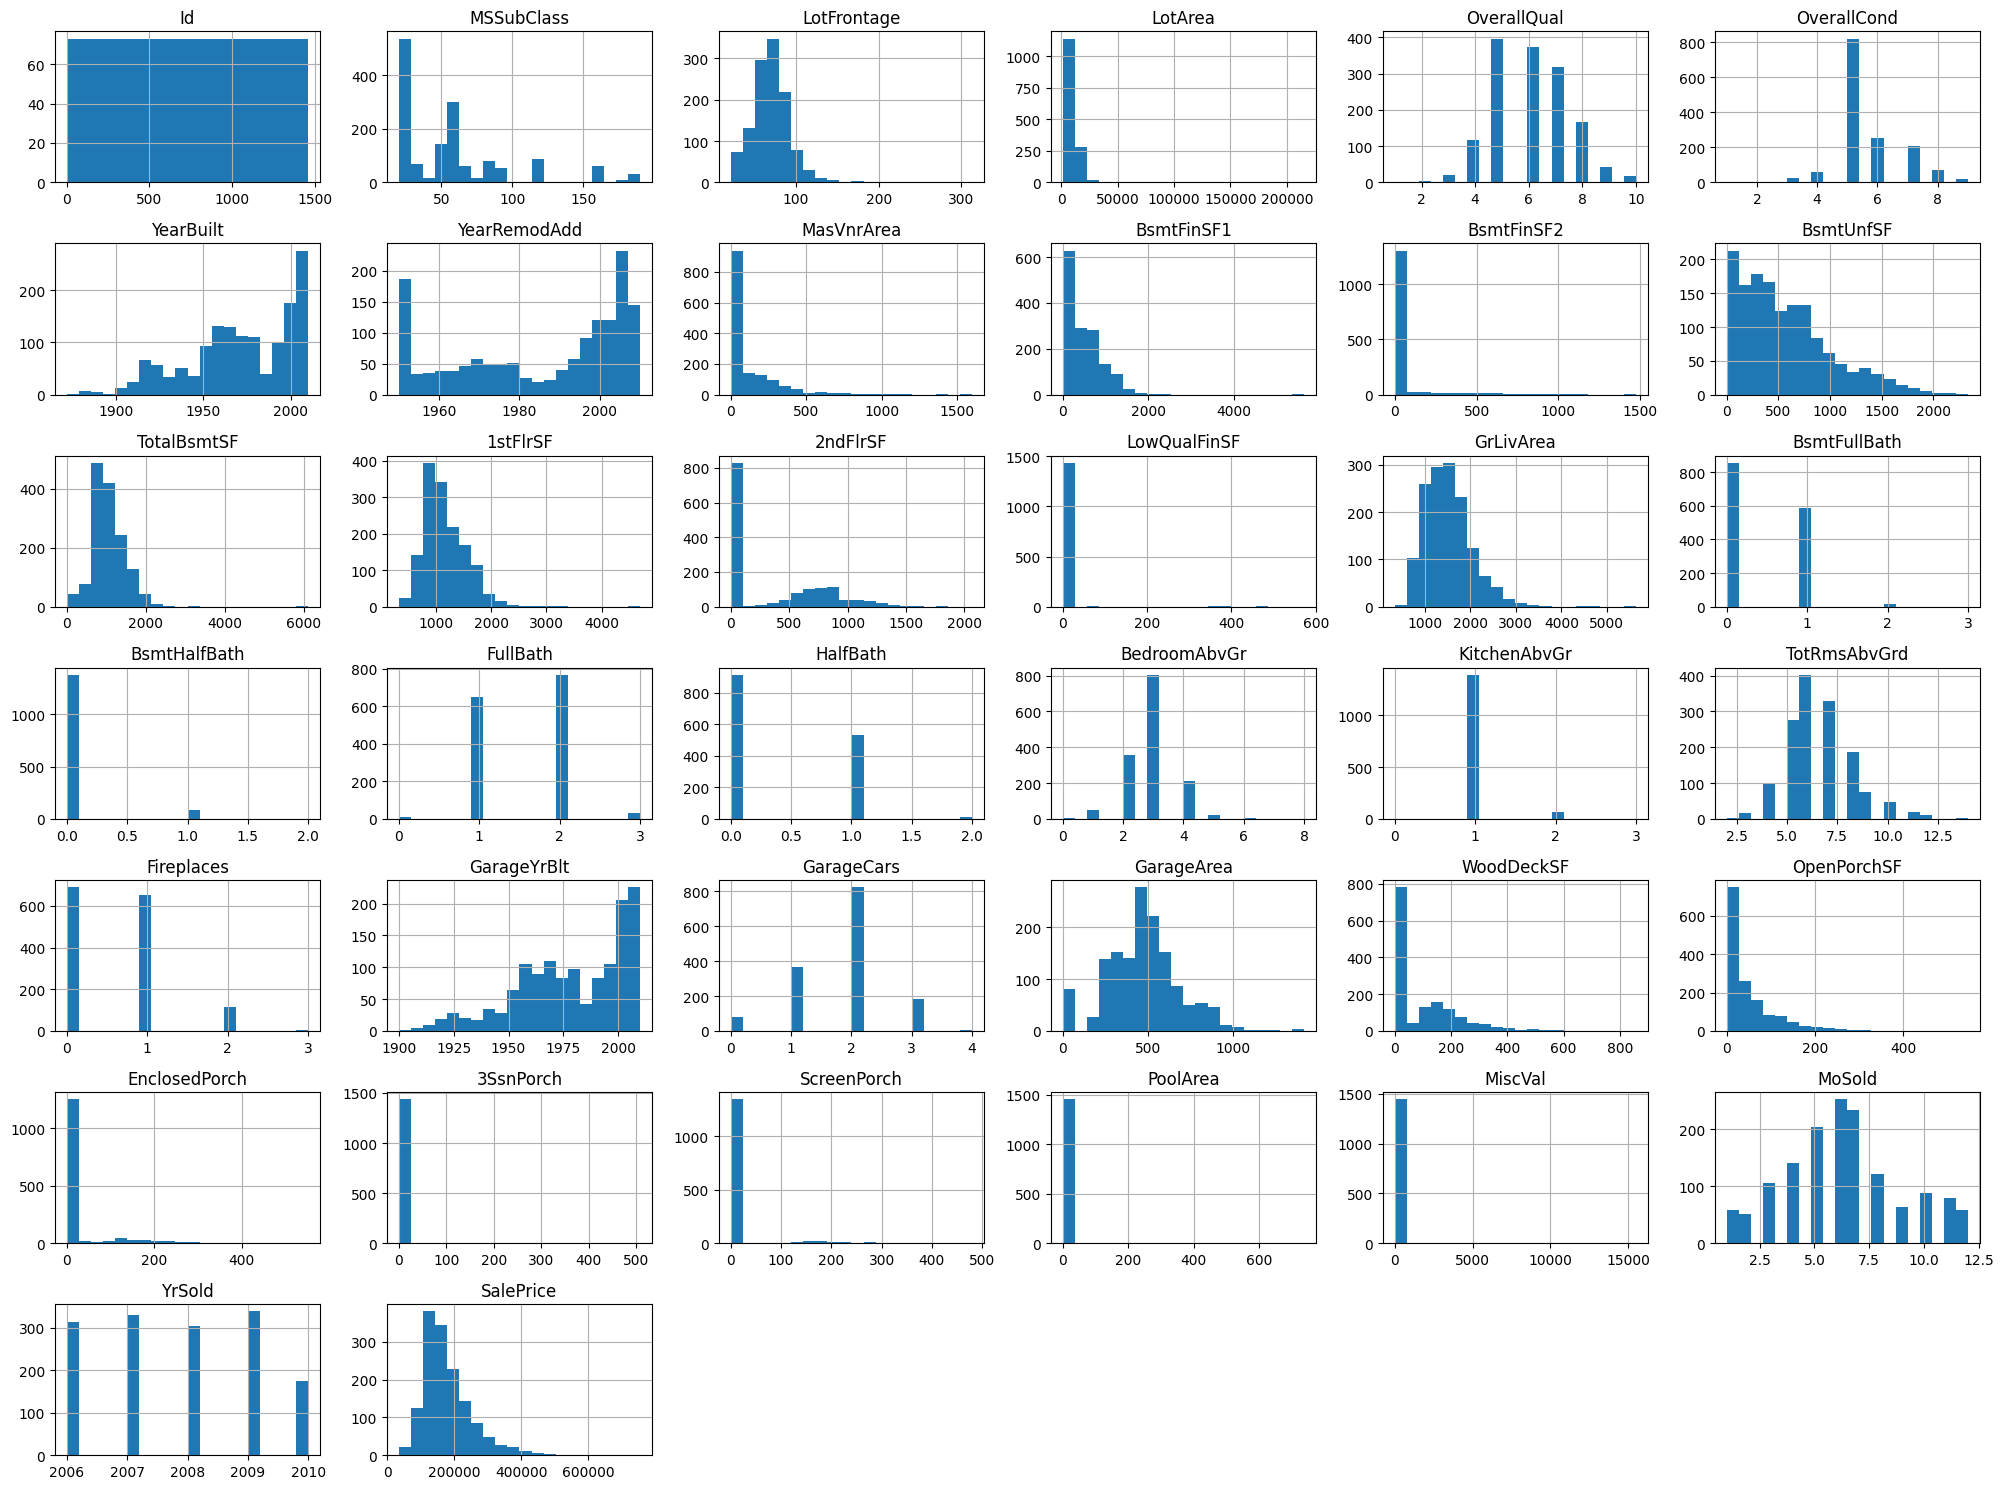

In [15]:
import matplotlib.pyplot as plt

df_train.hist(bins=20, figsize=(20,15))
plt.tight_layout()
plt.show()

/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_19376/1907151194.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Blues')
/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_19376/1907151194.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Blues')
/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_19376/1907151194.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.co

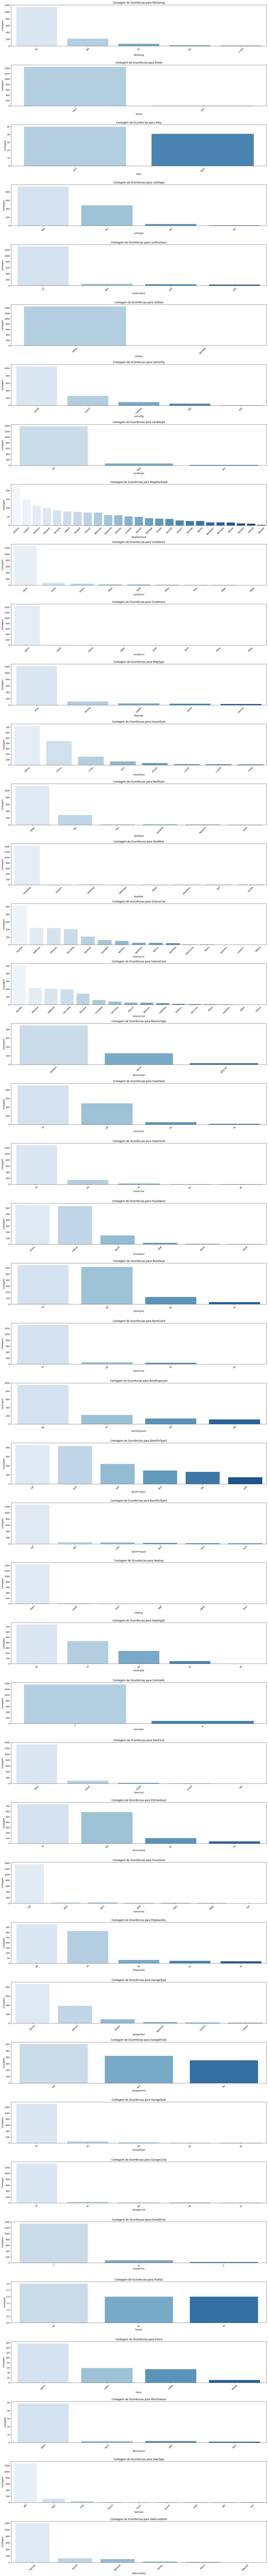

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame se chama df_train
# Filtra as colunas categóricas, pode ser pelas colunas 'category' ou 'object'
categorical_cols = df_train.select_dtypes(include=['category', 'object']).columns.tolist()

# Ajusta o tamanho da figura para mostrar múltiplos gráficos
plt.figure(figsize=(18, len(categorical_cols)*4))

# Loop para criar um gráfico para cada variável categórica
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Blues')
    plt.title(f'Contagem de Ocorrências para {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [17]:
df_train['SalePrice'].mean()

np.float64(180921.19589041095)

Verificando a variavél alvo: **SalePrice**

In [18]:
# Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

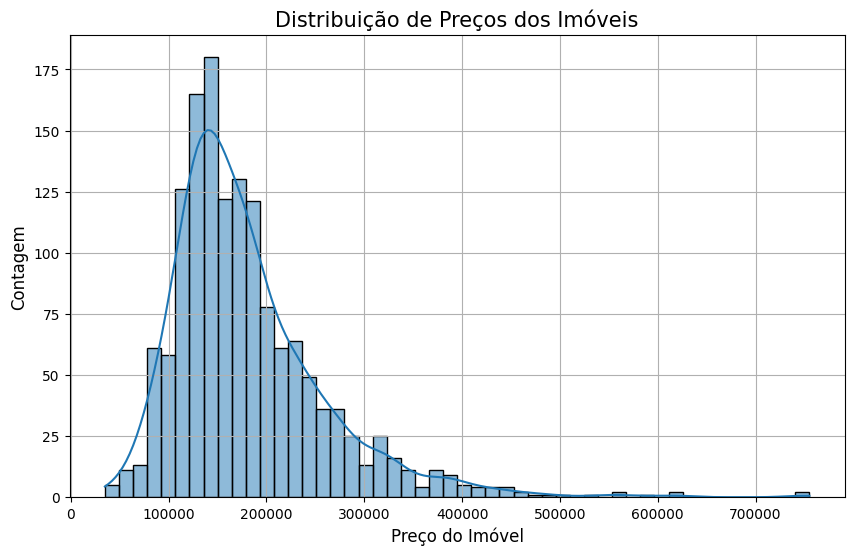

In [19]:
# A distribuição dos preços
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], bins=50, kde=True)
plt.title('Distribuição de Preços dos Imóveis', fontsize=15)
plt.xlabel('Preço do Imóvel', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.grid(True)
plt.show()

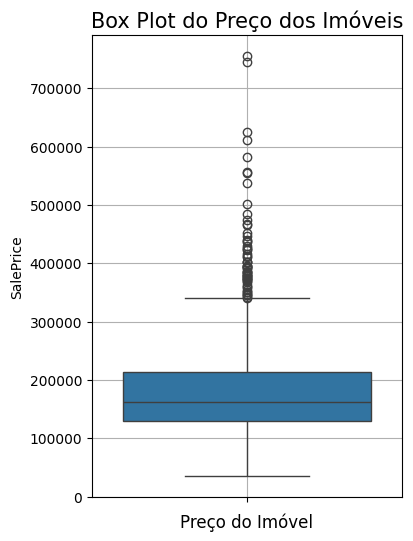

In [20]:
# A média e os outliers
plt.figure(figsize=(4, 6))
sns.boxplot(y=df_train['SalePrice'])
plt.title('Box Plot do Preço dos Imóveis', fontsize=15)
plt.xlabel('Preço do Imóvel', fontsize=12)
plt.grid(True)
plt.show()

Fazendo uma visualização da variavel alvo com algumas colunas

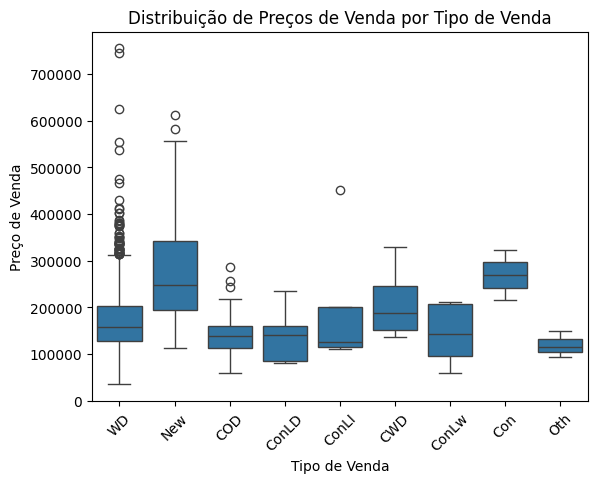

In [21]:
# plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleType', y='SalePrice', data=df_train)
plt.title('Distribuição de Preços de Venda por Tipo de Venda')
plt.xlabel('Tipo de Venda')
plt.ylabel('Preço de Venda')
plt.xticks(rotation=45)
plt.show()

/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_19376/634603544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='OverallQual', y='SalePrice', data=df_train, palette='Blues', inner='quartile')


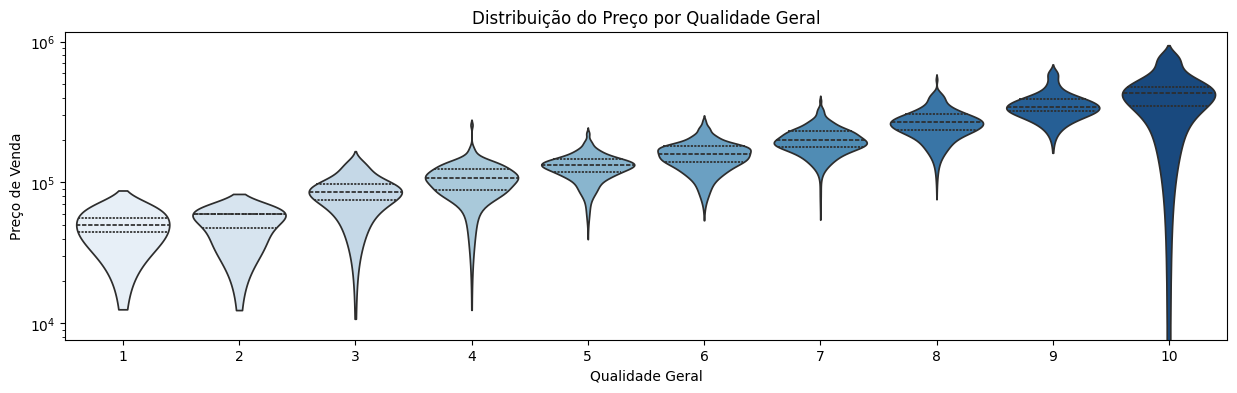

In [22]:
plt.figure(figsize=(15, 4))
sns.violinplot(x='OverallQual', y='SalePrice', data=df_train, palette='Blues', inner='quartile')
plt.title('Distribuição do Preço por Qualidade Geral')
plt.xlabel('Qualidade Geral')
plt.ylabel('Preço de Venda')
plt.yscale('log')
plt.show()

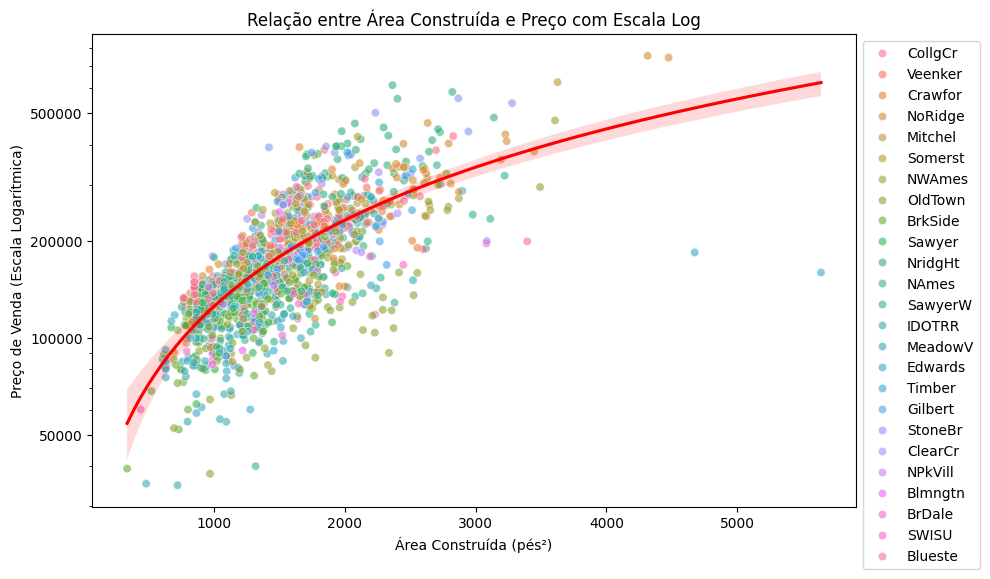

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, alpha=0.6, hue='Neighborhood')
plt.yscale('log')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.yticks([50000, 100000, 200000, 500000, 1000000])

sns.regplot(x='GrLivArea', y='SalePrice', data=df_train, scatter=False, color='red')

plt.xlabel('Área Construída (pés²)')
plt.ylabel('Preço de Venda (Escala Logarítmica)')
plt.title('Relação entre Área Construída e Preço com Escala Log')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

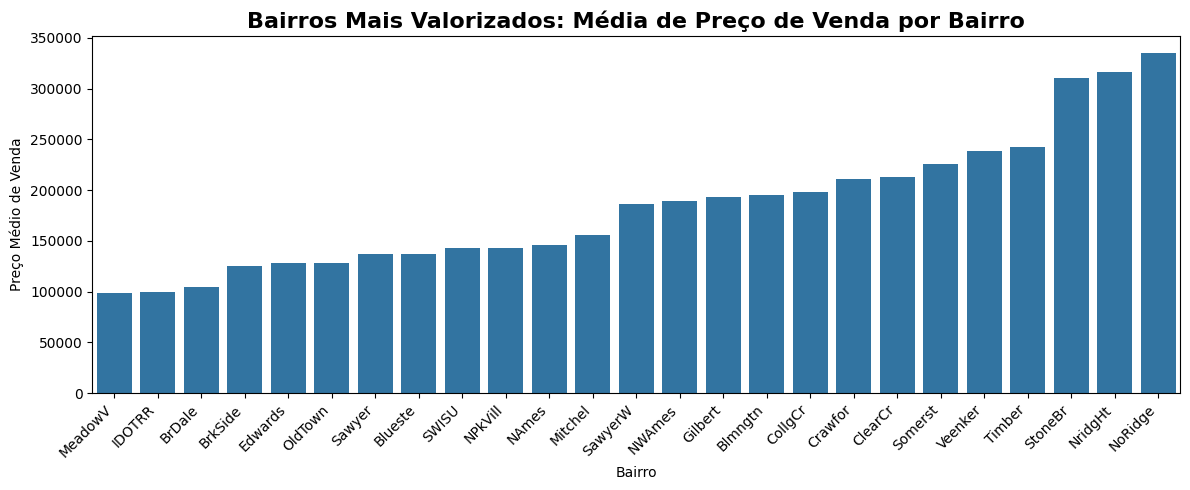

In [24]:
# Calcula as médias
mean_prices = df_train.groupby('Neighborhood')['SalePrice'].mean().reset_index()

# Ordena o DataFrame pelo preço médio em ordem crescente
mean_prices_sorted = mean_prices.sort_values('SalePrice', ascending=True)

plt.figure(figsize=(12, 5))

# Passa a ordem ordenada para o parâmetro order usando os bairros ordenados
sns.barplot(x='Neighborhood', y='SalePrice', data=mean_prices_sorted,
            order=mean_prices_sorted['Neighborhood'])

plt.xticks(rotation=45, ha='right')
plt.ylabel('Preço Médio de Venda')
plt.xlabel('Bairro')
plt.title('Bairros Mais Valorizados: Média de Preço de Venda por Bairro', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


<Axes: >

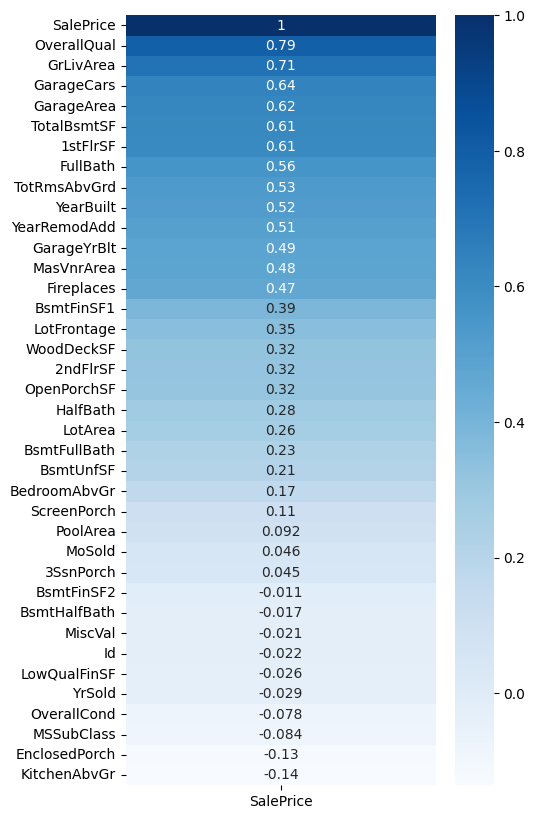

In [25]:
# Descobrir relações numéricas
plt.figure(figsize=(5, 10))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap="Blues")

### Tratando os Dados

In [26]:
from sklearn.preprocessing import OneHotEncoder

Otimizando as Colunas categóricas

[ FEITO ] Ajustar tipos (ex: definir ‘category’, ‘object’ ou ‘int’ onde precisa)

[ FEITO ] Tratar valores faltantes

[ FEITO ] Mapear variáveis binárias simples (ex: Street) para 0/1

COLUNAS CATEGORICAS

- 'MSZoning' - FEITO
- 'Street' - FEITO
- 'Alley' - FEITO
- 'LotShape' - FEITO
- 'LandContour' - FEITO
- 'Utilities' - N/A
- 'LotConfig' - FEITO
- 'LandSlope' - FEITO - VALIDAR PORQUE ESTA VAZIO 
- 'Neighborhood' - FEITO - OneHot
- 'Condition1' - FEITO Nova coluna - Concat
- 'Condition2' - FEITO Nova coluna - Concat
- 'BldgType' - FEITO - Binário 0-4
- 'HouseStyle' - FEITO - OneHot
- 'RoofStyle'' - FEITO - OneHot
- 'RoofMatl' - FEITO - OneHot
- 'Exterior1st'  - FEITO - OneHot Concat
- 'Exterior2nd'  - FEITO - OneHot Concat
- 'MasVnrType' - FEITO
- 'ExterQual' - FEITO
- 'ExterCond' - FEITO
- 'Foundation' - FEITO - OneHot
- 'BsmtQual' - FEITO - OneHot
- 'BsmtCond'  - FEITO - OneHot
- 'BsmtExposure'  - FEITO - OneHot
- 'BsmtFinType1' - FEITO Nova coluna - Concat
- 'BsmtFinType2' - FEITO Nova coluna - Concat
- 'Heating' - FEITO - OneHot
- 'HeatingQC' - FEITO
- 'CentralAir' - FEITO
- 'Electrical' - FEITO - OneHot
- 'KitchenQual' - FEITO
- 'Functional' - FEITO Nominal
- 'FireplaceQu' - FEITO - Ordinal
- 'GarageType' - FEITO - OneHot
- 'GarageFinish' - FEITO
- 'GarageQual' - FEITO
- 'GarageCond' - FEITO
- 'PavedDrive' - FEITO
- 'PoolQC' - FEITO
- 'Fence' - FEITO
- 'MiscFeature' - FEITO - OneHot
- 'SaleType' - FEITO - OneHot
- 'SaleCondition' - FEITO - OneHot

👇🏻 Terminar
- Utilities | Totalmente desbalanceado | 
- MiscFeature | Categórica nominal, maioria “None”. Use one-hot encoding ou crie variável binária “tem alguma feature extra” (1 = sim, 0 = não), dependendo da relevância. |
- MiscVal | Mesmo caso dade cima |

In [27]:
# Criação de um novo df
df_clear = pd.DataFrame({'Id': df_train['Id']})

---

##### Colunas com 2 Categorias - Transformadas em uma coluna binária

In [28]:
# Street
df_clear['Street_encoded'] = df_train['Street'].map({'Pave': 1, 'Grvl':0})

In [29]:
# Alley
df_clear['HasAlley'] = df_train['Alley'].map({'Pave': 1, 'Grvl': 1})
df_clear['HasAlley'] = df_clear['HasAlley'].fillna(0)

In [30]:
# CentralAir
df_clear['CentralAir_encoded'] = df_train['CentralAir'].map({'Y': 1, 'N': 0})

#### Colunas com 3 ou + - Transformadas em uma Matriz binária sem relação ordenada

In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def add_onehot_column(df_train, df_clear, col_name, drop=None):
    """
    Aplica OneHotEncoder do scikit-learn a uma coluna categórica df_train[col_name]
    e concatena o resultado no df_clear.

    Parâmetros:
    - df_train: DataFrame original com dados
    - df_clear: DataFrame destino onde as novas colunas serão adicionadas
    - col_name: nome da coluna categórica a ser codificada
    - drop: parâmetro do OneHotEncoder para evitar multicolinearidade (ex: 'first', 'if_binary', None)

    Retorna:
    - df_clear com as colunas one-hot adicionadas
    """

    # Criar o encoder
    ohe = OneHotEncoder(sparse_output=False, drop=drop, handle_unknown='ignore')

    # Preparar a coluna para o encoder (reshape 2D) e converter para string para evitar erros com NaNs
    col_array = df_train[col_name].astype(str).values.reshape(-1, 1)

    # Ajustar encoder e transformar
    ohe.fit(col_array)
    col_encoded = ohe.transform(col_array)

    # Criar nomes das colunas no formato "coluna_categoria"
    col_names = [f"{col_name}_{cat}" for cat in ohe.categories_[0]]

    # Criar DataFrame codificado mantendo o índice original para concatenar
    col_df = pd.DataFrame(col_encoded, columns=col_names, index=df_train.index)

    # Concatenar as colunas codificadas no df_clear
    df_clear = pd.concat([df_clear, col_df], axis=1)

    return df_clear

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cols = ['BsmtFinType1', 'BsmtFinType2']

# Preencher NaNs por 'Missing'
for col in cols:
    df_train[col] = df_train[col].fillna('Missing')

# OneHotEncoder do scikit-learn
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')

# Extrair colunas para codificar e converter para string (prevenção contra erros)
data_to_encode = df_train[cols].astype(str)

# Ajustar e transformar
encoded_array = ohe.fit_transform(data_to_encode)

# Gerar nomes das colunas codificadas no formato "coluna_categoria"
col_names = []
for col, categories in zip(cols, ohe.categories_):
    col_names.extend([f"{col}_{cat}" for cat in categories])

# Criar DataFrame com as novas colunas codificadas
encoded_df = pd.DataFrame(encoded_array, columns=col_names, index=df_train.index)

# Concatenar ao df_clear
df_clear = pd.concat([df_clear, encoded_df], axis=1)

df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Missing  BsmtFinType2_Rec  \
0               0.0               0.0                   0.0               0.0   
1               0.0               0.0                   0.0               0.0   
2               0.0               0.0                   0.0               0.0   
3               0.0               0.0                   0.0               0.0   
4               0.0               0.0                   0.0               0.0   

   BsmtFinType2_Unf  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0

In [33]:
# MSSubClass 
df_clear = add_onehot_column(df_train, df_clear, 'MSSubClass')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0.0  ...            0.0            0.0            0.0   
1               0.0  ...            0.0            0.0            0.0   
2               0.0  ...            0.0            0.0            0.0   
3               0.0  ...            0.0            0.0            0.0   
4               0.0  ...            0.0            0.0            0.0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0            0.0            1.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            1.0            0.0            0.0            0.0   
3            0.0            0.0            1.0            0.0            0.0   
4            0.0            1.0            0.0            0.0            0.0   

   MSSubClass_85  MSSubClass_90  
0            0.0            0.0  
1            0.0            0.0  
2            0.0            0.0  
3            0.0            0.0  
4            0.0            0.0  

[5 rows x 33 columns]

In [34]:
# GarageType
df_train['GarageType'] = df_train['GarageType'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'GarageType')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0               0.0  ...            0.0            0.0            0.0   
1               0.0  ...            0.0            0.0            0.0   
2               0.0  ...            0.0            0.0            0.0   
3               0.0  ...            0.0            0.0            0.0   
4               0.0  ...            0.0            0.0            0.0   

   GarageType_2Types  GarageType_Attchd  GarageType_Basment  \
0                0.0                1.0                 0.0   
1                0.0                1.0                 0.0   
2                0.0                1.0                 0.0   
3                0.0                0.0                 0.0   
4                0.0                1.0                 0.0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                1.0   
4                 0.0                 0.0                0.0   

   GarageType_Missing  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 40 columns]

In [35]:
# LotShape
df_clear = add_onehot_column(df_train, df_clear, 'LotShape')
df_clear.head()


Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  GarageType_Attchd  GarageType_Basment  \
0               0.0  ...                1.0                 0.0   
1               0.0  ...                1.0                 0.0   
2               0.0  ...                1.0                 0.0   
3               0.0  ...                0.0                 0.0   
4               0.0  ...                1.0                 0.0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                1.0   
4                 0.0                 0.0                0.0   

   GarageType_Missing  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  
0                 0.0           0.0           0.0           0.0           1.0  
1                 0.0           0.0           0.0           0.0           1.0  
2                 0.0           1.0           0.0           0.0           0.0  
3                 0.0           1.0           0.0           0.0           0.0  
4                 0.0           1.0           0.0           0.0           0.0  

[5 rows x 44 columns]

In [36]:
# MSZoning
df_clear = add_onehot_column(df_train, df_clear, 'MSZoning')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  GarageType_Missing  LotShape_IR1  LotShape_IR2  \
0               0.0  ...                 0.0           0.0           0.0   
1               0.0  ...                 0.0           0.0           0.0   
2               0.0  ...                 0.0           1.0           0.0   
3               0.0  ...                 0.0           1.0           0.0   
4               0.0  ...                 0.0           1.0           0.0   

   LotShape_IR3  LotShape_Reg  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0           0.0           1.0               0.0          0.0          0.0   
1           0.0           1.0               0.0          0.0          0.0   
2           0.0           0.0               0.0          0.0          0.0   
3           0.0           0.0               0.0          0.0          0.0   
4           0.0           0.0               0.0          0.0          0.0   

   MSZoning_RL  MSZoning_RM  
0          1.0          0.0  
1          1.0          0.0  
2          1.0          0.0  
3          1.0          0.0  
4          1.0          0.0  

[5 rows x 49 columns]

In [37]:
# BldgType
df_clear = add_onehot_column(df_train, df_clear, 'BldgType')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0               0.0  ...               0.0          0.0          0.0   
1               0.0  ...               0.0          0.0          0.0   
2               0.0  ...               0.0          0.0          0.0   
3               0.0  ...               0.0          0.0          0.0   
4               0.0  ...               0.0          0.0          0.0   

   MSZoning_RL  MSZoning_RM  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0          1.0          0.0            1.0              0.0              0.0   
1          1.0          0.0            1.0              0.0              0.0   
2          1.0          0.0            1.0              0.0              0.0   
3          1.0          0.0            1.0              0.0              0.0   
4          1.0          0.0            1.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  
0             0.0              0.0  
1             0.0              0.0  
2             0.0              0.0  
3             0.0              0.0  
4             0.0              0.0  

[5 rows x 54 columns]

In [38]:
# LandContour
df_clear = add_onehot_column(df_train, df_clear, 'LandContour')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  MSZoning_RM  BldgType_1Fam  BldgType_2fmCon  \
0               0.0  ...          0.0            1.0              0.0   
1               0.0  ...          0.0            1.0              0.0   
2               0.0  ...          0.0            1.0              0.0   
3               0.0  ...          0.0            1.0              0.0   
4               0.0  ...          0.0            1.0              0.0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  LandContour_Bnk  \
0              0.0             0.0              0.0              0.0   
1              0.0             0.0              0.0              0.0   
2              0.0             0.0              0.0              0.0   
3              0.0             0.0              0.0              0.0   
4              0.0             0.0              0.0              0.0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  
0              0.0              0.0              1.0  
1              0.0              0.0              1.0  
2              0.0              0.0              1.0  
3              0.0              0.0              1.0  
4              0.0              0.0              1.0  

[5 rows x 58 columns]

In [39]:
# LotConfig
df_clear = add_onehot_column(df_train, df_clear, 'LotConfig')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  BldgType_TwnhsE  LandContour_Bnk  LandContour_HLS  \
0               0.0  ...              0.0              0.0              0.0   
1               0.0  ...              0.0              0.0              0.0   
2               0.0  ...              0.0              0.0              0.0   
3               0.0  ...              0.0              0.0              0.0   
4               0.0  ...              0.0              0.0              0.0   

   LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
0              0.0              1.0               0.0                0.0   
1              0.0              1.0               0.0                0.0   
2              0.0              1.0               0.0                0.0   
3              0.0              1.0               1.0                0.0   
4              0.0              1.0               0.0                0.0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  
0            0.0            0.0               1.0  
1            1.0            0.0               0.0  
2            0.0            0.0               1.0  
3            0.0            0.0               0.0  
4            1.0            0.0               0.0  

[5 rows x 63 columns]

In [40]:
# LandSlope
df_clear = add_onehot_column(df_train, df_clear, 'LandSlope')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0               0.0  ...              0.0              1.0               0.0   
1               0.0  ...              0.0              1.0               0.0   
2               0.0  ...              0.0              1.0               0.0   
3               0.0  ...              0.0              1.0               1.0   
4               0.0  ...              0.0              1.0               0.0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                0.0            0.0            0.0               1.0   
1                0.0            1.0            0.0               0.0   
2                0.0            0.0            0.0               1.0   
3                0.0            0.0            0.0               0.0   
4                0.0            1.0            0.0               0.0   

   LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  
0            1.0            0.0            0.0  
1            1.0            0.0            0.0  
2            1.0            0.0            0.0  
3            1.0            0.0            0.0  
4            1.0            0.0            0.0  

[5 rows x 66 columns]

In [41]:
# PaveDrive
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
paveddrive_array = df_train['PavedDrive'].astype(str).values.reshape(-1, 1)
ohe.fit(paveddrive_array)
paveddrive_encoded = ohe.transform(paveddrive_array)
col_names = [f"PavedDrive_{cat}" for cat in ohe.categories_[0]]
paveddrive_df = pd.DataFrame(paveddrive_encoded, columns=col_names, index=df_train.index)
df_clear = pd.concat([df_clear, paveddrive_df], axis=1)
df_clear.head()


Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0               0.0  ...                0.0            0.0            0.0   
1               0.0  ...                0.0            1.0            0.0   
2               0.0  ...                0.0            0.0            0.0   
3               0.0  ...                0.0            0.0            0.0   
4               0.0  ...                0.0            1.0            0.0   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
0               1.0            1.0            0.0            0.0   
1               0.0            1.0            0.0            0.0   
2               1.0            1.0            0.0            0.0   
3               0.0            1.0            0.0            0.0   
4               0.0            1.0            0.0            0.0   

   PavedDrive_N  PavedDrive_P  PavedDrive_Y  
0           0.0           0.0           1.0  
1           0.0           0.0           1.0  
2           0.0           0.0           1.0  
3           0.0           0.0           1.0  
4           0.0           0.0           1.0  

[5 rows x 69 columns]

In [42]:
# MasVnrType
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'MasVnrType')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
0               0.0  ...            1.0            0.0            0.0   
1               0.0  ...            1.0            0.0            0.0   
2               0.0  ...            1.0            0.0            0.0   
3               0.0  ...            1.0            0.0            0.0   
4               0.0  ...            1.0            0.0            0.0   

   PavedDrive_N  PavedDrive_P  PavedDrive_Y  MasVnrType_BrkCmn  \
0           0.0           0.0           1.0                0.0   
1           0.0           0.0           1.0                0.0   
2           0.0           0.0           1.0                0.0   
3           0.0           0.0           1.0                0.0   
4           0.0           0.0           1.0                0.0   

   MasVnrType_BrkFace  MasVnrType_Missing  MasVnrType_Stone  
0                 1.0                 0.0               0.0  
1                 0.0                 1.0               0.0  
2                 1.0                 0.0               0.0  
3                 0.0                 1.0               0.0  
4                 1.0                 0.0               0.0  

[5 rows x 73 columns]

In [43]:
# GarageFinish
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'GarageFinish')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  PavedDrive_P  PavedDrive_Y  MasVnrType_BrkCmn  \
0               0.0  ...           0.0           1.0                0.0   
1               0.0  ...           0.0           1.0                0.0   
2               0.0  ...           0.0           1.0                0.0   
3               0.0  ...           0.0           1.0                0.0   
4               0.0  ...           0.0           1.0                0.0   

   MasVnrType_BrkFace  MasVnrType_Missing  MasVnrType_Stone  GarageFinish_Fin  \
0                 1.0                 0.0               0.0               0.0   
1                 0.0                 1.0               0.0               0.0   
2                 1.0                 0.0               0.0               0.0   
3                 0.0                 1.0               0.0               0.0   
4                 1.0                 0.0               0.0               0.0   

   GarageFinish_Missing  GarageFinish_RFn  GarageFinish_Unf  
0                   0.0               1.0               0.0  
1                   0.0               1.0               0.0  
2                   0.0               1.0               0.0  
3                   0.0               0.0               1.0  
4                   0.0               1.0               0.0  

[5 rows x 77 columns]

In [44]:
# Electrical
df_train['Electrical'] = df_train['Electrical'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'Electrical')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  GarageFinish_Fin  GarageFinish_Missing  \
0               0.0  ...               0.0                   0.0   
1               0.0  ...               0.0                   0.0   
2               0.0  ...               0.0                   0.0   
3               0.0  ...               0.0                   0.0   
4               0.0  ...               0.0                   0.0   

   GarageFinish_RFn  GarageFinish_Unf  Electrical_FuseA  Electrical_FuseF  \
0               1.0               0.0               0.0               0.0   
1               1.0               0.0               0.0               0.0   
2               1.0               0.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               1.0               0.0               0.0               0.0   

   Electrical_FuseP  Electrical_Missing  Electrical_Mix  Electrical_SBrkr  
0               0.0                 0.0             0.0               1.0  
1               0.0                 0.0             0.0               1.0  
2               0.0                 0.0             0.0               1.0  
3               0.0                 0.0             0.0               1.0  
4               0.0                 0.0             0.0               1.0  

[5 rows x 83 columns]

In [45]:
# BsmtQual
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'BsmtQual')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  Electrical_FuseF  Electrical_FuseP  \
0               0.0  ...               0.0               0.0   
1               0.0  ...               0.0               0.0   
2               0.0  ...               0.0               0.0   
3               0.0  ...               0.0               0.0   
4               0.0  ...               0.0               0.0   

   Electrical_Missing  Electrical_Mix  Electrical_SBrkr  BsmtQual_Ex  \
0                 0.0             0.0               1.0          0.0   
1                 0.0             0.0               1.0          0.0   
2                 0.0             0.0               1.0          0.0   
3                 0.0             0.0               1.0          0.0   
4                 0.0             0.0               1.0          0.0   

   BsmtQual_Fa  BsmtQual_Gd  BsmtQual_Missing  BsmtQual_TA  
0          0.0          1.0               0.0          0.0  
1          0.0          1.0               0.0          0.0  
2          0.0          1.0               0.0          0.0  
3          0.0          0.0               0.0          1.0  
4          0.0          1.0               0.0          0.0  

[5 rows x 88 columns]

In [46]:
# BsmtCond
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'BsmtCond')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  \
0               0.0  ...          0.0          0.0          1.0   
1               0.0  ...          0.0          0.0          1.0   
2               0.0  ...          0.0          0.0          1.0   
3               0.0  ...          0.0          0.0          0.0   
4               0.0  ...          0.0          0.0          1.0   

   BsmtQual_Missing  BsmtQual_TA  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Missing  \
0               0.0          0.0          0.0          0.0               0.0   
1               0.0          0.0          0.0          0.0               0.0   
2               0.0          0.0          0.0          0.0               0.0   
3               0.0          1.0          0.0          1.0               0.0   
4               0.0          0.0          0.0          0.0               0.0   

   BsmtCond_Po  BsmtCond_TA  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          0.0  
4          0.0          1.0  

[5 rows x 93 columns]

In [47]:
# BsmtCond
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'BsmtExposure')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Missing  \
0               0.0  ...          0.0          0.0               0.0   
1               0.0  ...          0.0          0.0               0.0   
2               0.0  ...          0.0          0.0               0.0   
3               0.0  ...          0.0          1.0               0.0   
4               0.0  ...          0.0          0.0               0.0   

   BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
0          0.0          1.0              0.0              0.0   
1          0.0          1.0              0.0              1.0   
2          0.0          1.0              0.0              0.0   
3          0.0          0.0              0.0              0.0   
4          0.0          1.0              1.0              0.0   

   BsmtExposure_Missing  BsmtExposure_Mn  BsmtExposure_No  
0                   0.0              0.0              1.0  
1                   0.0              0.0              0.0  
2                   0.0              1.0              0.0  
3                   0.0              0.0              1.0  
4                   0.0              0.0              0.0  

[5 rows x 98 columns]

In [48]:
# BsmtCond
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'MiscFeature')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  BsmtExposure_Av  BsmtExposure_Gd  \
0               0.0  ...              0.0              0.0   
1               0.0  ...              0.0              1.0   
2               0.0  ...              0.0              0.0   
3               0.0  ...              0.0              0.0   
4               0.0  ...              1.0              0.0   

   BsmtExposure_Missing  BsmtExposure_Mn  BsmtExposure_No  MiscFeature_Gar2  \
0                   0.0              0.0              1.0               0.0   
1                   0.0              0.0              0.0               0.0   
2                   0.0              1.0              0.0               0.0   
3                   0.0              0.0              1.0               0.0   
4                   0.0              0.0              0.0               0.0   

   MiscFeature_Missing  MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  
0                  1.0               0.0               0.0               0.0  
1                  1.0               0.0               0.0               0.0  
2                  1.0               0.0               0.0               0.0  
3                  1.0               0.0               0.0               0.0  
4                  1.0               0.0               0.0               0.0  

[5 rows x 103 columns]

In [49]:
# RoofStyle
df_clear = add_onehot_column(df_train, df_clear, 'RoofStyle')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  MiscFeature_Missing  MiscFeature_Othr  \
0               0.0  ...                  1.0               0.0   
1               0.0  ...                  1.0               0.0   
2               0.0  ...                  1.0               0.0   
3               0.0  ...                  1.0               0.0   
4               0.0  ...                  1.0               0.0   

   MiscFeature_Shed  MiscFeature_TenC  RoofStyle_Flat  RoofStyle_Gable  \
0               0.0               0.0             0.0              1.0   
1               0.0               0.0             0.0              1.0   
2               0.0               0.0             0.0              1.0   
3               0.0               0.0             0.0              1.0   
4               0.0               0.0             0.0              1.0   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  
0                0.0            0.0                0.0             0.0  
1                0.0            0.0                0.0             0.0  
2                0.0            0.0                0.0             0.0  
3                0.0            0.0                0.0             0.0  
4                0.0            0.0                0.0             0.0  

[5 rows x 109 columns]

In [50]:
# Foundation
df_clear = add_onehot_column(df_train, df_clear, 'Foundation')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0               0.0  ...                0.0            0.0                0.0   
1               0.0  ...                0.0            0.0                0.0   
2               0.0  ...                0.0            0.0                0.0   
3               0.0  ...                0.0            0.0                0.0   
4               0.0  ...                0.0            0.0                0.0   

   RoofStyle_Shed  Foundation_BrkTil  Foundation_CBlock  Foundation_PConc  \
0             0.0                0.0                0.0               1.0   
1             0.0                0.0                1.0               0.0   
2             0.0                0.0                0.0               1.0   
3             0.0                1.0                0.0               0.0   
4             0.0                0.0                0.0               1.0   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  
0              0.0               0.0              0.0  
1              0.0               0.0              0.0  
2              0.0               0.0              0.0  
3              0.0               0.0              0.0  
4              0.0               0.0              0.0  

[5 rows x 115 columns]

In [51]:
# Functional
df_clear = add_onehot_column(df_train, df_clear, 'Functional')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0               0.0  ...              0.0               0.0              0.0   
1               0.0  ...              0.0               0.0              0.0   
2               0.0  ...              0.0               0.0              0.0   
3               0.0  ...              0.0               0.0              0.0   
4               0.0  ...              0.0               0.0              0.0   

   Functional_Maj1  Functional_Maj2  Functional_Min1  Functional_Min2  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   Functional_Mod  Functional_Sev  Functional_Typ  
0             0.0             0.0             1.0  
1             0.0             0.0             1.0  
2             0.0             0.0             1.0  
3             0.0             0.0             1.0  
4             0.0             0.0             1.0  

[5 rows x 122 columns]

In [52]:
# Heating
df_clear = add_onehot_column(df_train, df_clear, 'Heating')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  Functional_Min2  Functional_Mod  Functional_Sev  \
0               0.0  ...              0.0             0.0             0.0   
1               0.0  ...              0.0             0.0             0.0   
2               0.0  ...              0.0             0.0             0.0   
3               0.0  ...              0.0             0.0             0.0   
4               0.0  ...              0.0             0.0             0.0   

   Functional_Typ  Heating_Floor  Heating_GasA  Heating_GasW  Heating_Grav  \
0             1.0            0.0           1.0           0.0           0.0   
1             1.0            0.0           1.0           0.0           0.0   
2             1.0            0.0           1.0           0.0           0.0   
3             1.0            0.0           1.0           0.0           0.0   
4             1.0            0.0           1.0           0.0           0.0   

   Heating_OthW  Heating_Wall  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  

[5 rows x 128 columns]

In [53]:
# SaleCondition
df_clear = add_onehot_column(df_train, df_clear, 'SaleCondition')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  Heating_GasW  Heating_Grav  Heating_OthW  \
0               0.0  ...           0.0           0.0           0.0   
1               0.0  ...           0.0           0.0           0.0   
2               0.0  ...           0.0           0.0           0.0   
3               0.0  ...           0.0           0.0           0.0   
4               0.0  ...           0.0           0.0           0.0   

   Heating_Wall  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0           0.0                    0.0                    0.0   
1           0.0                    0.0                    0.0   
2           0.0                    0.0                    0.0   
3           0.0                    1.0                    0.0   
4           0.0                    0.0                    0.0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   SaleCondition_Partial  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 134 columns]

In [54]:
# SaleType
df_clear = add_onehot_column(df_train, df_clear, 'SaleType')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  SaleCondition_Partial  SaleType_COD  SaleType_CWD  \
0               0.0  ...                    0.0           0.0           0.0   
1               0.0  ...                    0.0           0.0           0.0   
2               0.0  ...                    0.0           0.0           0.0   
3               0.0  ...                    0.0           0.0           0.0   
4               0.0  ...                    0.0           0.0           0.0   

   SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0           0.0             0.0             0.0             0.0           0.0   
1           0.0             0.0             0.0             0.0           0.0   
2           0.0             0.0             0.0             0.0           0.0   
3           0.0             0.0             0.0             0.0           0.0   
4           0.0             0.0             0.0             0.0           0.0   

   SaleType_Oth  SaleType_WD  
0           0.0          1.0  
1           0.0          1.0  
2           0.0          1.0  
3           0.0          1.0  
4           0.0          1.0  

[5 rows x 143 columns]

In [55]:
# RoofMatl
df_clear = add_onehot_column(df_train, df_clear, 'RoofMatl')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  SaleType_Oth  SaleType_WD  RoofMatl_ClyTile  \
0               0.0  ...           0.0          1.0               0.0   
1               0.0  ...           0.0          1.0               0.0   
2               0.0  ...           0.0          1.0               0.0   
3               0.0  ...           0.0          1.0               0.0   
4               0.0  ...           0.0          1.0               0.0   

   RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  \
0               1.0               0.0             0.0            0.0   
1               1.0               0.0             0.0            0.0   
2               1.0               0.0             0.0            0.0   
3               1.0               0.0             0.0            0.0   
4               1.0               0.0             0.0            0.0   

   RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  
0               0.0               0.0               0.0  
1               0.0               0.0               0.0  
2               0.0               0.0               0.0  
3               0.0               0.0               0.0  
4               0.0               0.0               0.0  

[5 rows x 151 columns]

In [56]:
# HouseStyle
df_clear = add_onehot_column(df_train, df_clear, 'HouseStyle')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  RoofMatl_WdShake  RoofMatl_WdShngl  \
0               0.0  ...               0.0               0.0   
1               0.0  ...               0.0               0.0   
2               0.0  ...               0.0               0.0   
3               0.0  ...               0.0               0.0   
4               0.0  ...               0.0               0.0   

   HouseStyle_1.5Fin  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                1.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  
0                0.0                1.0                0.0              0.0  
1                0.0                0.0                0.0              0.0  
2                0.0                1.0                0.0              0.0  
3                0.0                1.0                0.0              0.0  
4                0.0                1.0                0.0              0.0  

[5 rows x 159 columns]

In [57]:
# Neighborhood
df_clear = add_onehot_column(df_train, df_clear, 'Neighborhood')
df_clear.head()

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0   1               1       0.0                   1               0.0   
1   2               1       0.0                   1               1.0   
2   3               1       0.0                   1               0.0   
3   4               1       0.0                   1               1.0   
4   5               1       0.0                   1               0.0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Missing  \
0               0.0               1.0               0.0                   0.0   
1               0.0               0.0               0.0                   0.0   
2               0.0               1.0               0.0                   0.0   
3               0.0               0.0               0.0                   0.0   
4               0.0               1.0               0.0                   0.0   

   BsmtFinType1_Rec  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0               0.0  ...                   0.0                   0.0   
1               0.0  ...                   0.0                   0.0   
2               0.0  ...                   0.0                   0.0   
3               0.0  ...                   0.0                   0.0   
4               0.0  ...                   1.0                   0.0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                   0.0                 0.0                  0.0   
1                   0.0                 0.0                  0.0   
2                   0.0                 0.0                  0.0   
3                   0.0                 0.0                  0.0   
4                   0.0                 0.0                  0.0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   Neighborhood_Timber  Neighborhood_Veenker  
0                  0.0                   0.0  
1                  0.0                   1.0  
2                  0.0                   0.0  
3                  0.0                   0.0  
4                  0.0                   0.0  

[5 rows x 184 columns]

#### Colunas transformadas em variável ordinal

In [58]:
from pandas.api.types import CategoricalDtype

In [59]:
def encode_ordinal(df, col_name):
    """
    Encode coluna categórica ordinal, incluindo Missing para NaNs,
    e retorna a coluna ordinal numérica.
    """
    categories_ordered = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

    cat_type = CategoricalDtype(categories=categories_ordered, ordered=True)
    df[col_name] = df[col_name].astype(cat_type)
    return df[col_name].cat.codes

In [60]:
def encode_ordinal_with_missing(df, col_name, ):
    """
    Encode coluna categórica ordinal, incluindo Missing para NaNs,
    e retorna a coluna ordinal numérica.
    """
    df[col_name] = df[col_name].fillna('Missing').astype(str)

    categories_ordered = ['Missing','Po', 'Fa', 'TA', 'Gd', 'Ex']
    # Adicionar 'Missing' no topo para a ordem ou no fim para evitar interferência
    # Melhor deixar 'Missing' no topo, para indicar ausência = menor qualidade, por exemplo
    if 'Missing' not in categories_ordered:
        categories_ordered = ['Missing'] + categories_ordered

    cat_type = CategoricalDtype(categories=categories_ordered, ordered=True)
    df[col_name] = df[col_name].astype(cat_type)
    return df[col_name].cat.codes

In [61]:
# FireplaceQu
df_clear['FireplaceQu_ordinal'] = encode_ordinal_with_missing(df_train, 'FireplaceQu')
df_clear

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0        1               1       0.0                   1               0.0   
1        2               1       0.0                   1               1.0   
2        3               1       0.0                   1               0.0   
3        4               1       0.0                   1               1.0   
4        5               1       0.0                   1               0.0   
...    ...             ...       ...                 ...               ...   
1455  1456               1       0.0                   1               0.0   
1456  1457               1       0.0                   1               1.0   
1457  1458               1       0.0                   1               0.0   
1458  1459               1       0.0                   1               0.0   
1459  1460               1       0.0                   1               0.0   

      BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                  0.0               1.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               1.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               1.0               0.0   
...                ...               ...               ...   
1455               0.0               0.0               0.0   
1456               0.0               0.0               0.0   
1457               0.0               1.0               0.0   
1458               0.0               1.0               0.0   
1459               1.0               0.0               0.0   

      BsmtFinType1_Missing  BsmtFinType1_Rec  ...  Neighborhood_NridgHt  \
0                      0.0               0.0  ...                   0.0   
1                      0.0               0.0  ...                   0.0   
2                      0.0               0.0  ...                   0.0   
3                      0.0               0.0  ...                   0.0   
4                      0.0               0.0  ...                   0.0   
...                    ...               ...  ...                   ...   
1455                   0.0               0.0  ...                   0.0   
1456                   0.0               0.0  ...                   0.0   
1457                   0.0               0.0  ...                   0.0   
1458                   0.0               0.0  ...                   0.0   
1459                   0.0               0.0  ...                   0.0   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                      0.0                 0.0                  0.0   
1                      0.0                 0.0                  0.0   
2                      0.0                 0.0                  0.0   
3                      0.0                 0.0                  0.0   
4                      0.0                 0.0                  0.0   
...                    ...                 ...                  ...   
1455                   0.0                 0.0                  0.0   
1456                   0.0                 0.0                  0.0   
1457                   0.0                 0.0                  0.0   
1458                   0.0                 0.0                  0.0   
1459                   0.0                 0.0                  0.0   

      Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                      0.0                   0.0                   0.0   
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   0.0   
...                    ...                   ...                   ...   
1455                   0.0                   0.0      

In [62]:
# FireplaceQu
df_clear['GarageQual_ordinal'] = encode_ordinal_with_missing(df_train, 'GarageQual')
df_clear

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0        1               1       0.0                   1               0.0   
1        2               1       0.0                   1               1.0   
2        3               1       0.0                   1               0.0   
3        4               1       0.0                   1               1.0   
4        5               1       0.0                   1               0.0   
...    ...             ...       ...                 ...               ...   
1455  1456               1       0.0                   1               0.0   
1456  1457               1       0.0                   1               1.0   
1457  1458               1       0.0                   1               0.0   
1458  1459               1       0.0                   1               0.0   
1459  1460               1       0.0                   1               0.0   

      BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                  0.0               1.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               1.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               1.0               0.0   
...                ...               ...               ...   
1455               0.0               0.0               0.0   
1456               0.0               0.0               0.0   
1457               0.0               1.0               0.0   
1458               0.0               1.0               0.0   
1459               1.0               0.0               0.0   

      BsmtFinType1_Missing  BsmtFinType1_Rec  ...  Neighborhood_OldTown  \
0                      0.0               0.0  ...                   0.0   
1                      0.0               0.0  ...                   0.0   
2                      0.0               0.0  ...                   0.0   
3                      0.0               0.0  ...                   0.0   
4                      0.0               0.0  ...                   0.0   
...                    ...               ...  ...                   ...   
1455                   0.0               0.0  ...                   0.0   
1456                   0.0               0.0  ...                   0.0   
1457                   0.0               0.0  ...                   0.0   
1458                   0.0               0.0  ...                   0.0   
1459                   0.0               0.0  ...                   0.0   

      Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                    0.0                  0.0                   0.0   
1                    0.0                  0.0                   0.0   
2                    0.0                  0.0                   0.0   
3                    0.0                  0.0                   0.0   
4                    0.0                  0.0                   0.0   
...                  ...                  ...                   ...   
1455                 0.0                  0.0                   0.0   
1456                 0.0                  0.0                   0.0   
1457                 0.0                  0.0                   0.0   
1458                 0.0                  0.0                   0.0   
1459                 0.0                  0.0                   0.0   

      Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                      0.0                   0.0                  0.0   
1                      0.0                   0.0                  0.0   
2                      0.0                   0.0                  0.0   
3                      0.0                   0.0                  0.0   
4                      0.0                   0.0                  0.0   
...                    ...                   ...                  ...   
1455                   0.0                   0.0             

In [63]:
# GarageCond
df_clear['GarageCond_ordinal'] = encode_ordinal_with_missing(df_train, 'GarageCond')
df_clear

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0        1               1       0.0                   1               0.0   
1        2               1       0.0                   1               1.0   
2        3               1       0.0                   1               0.0   
3        4               1       0.0                   1               1.0   
4        5               1       0.0                   1               0.0   
...    ...             ...       ...                 ...               ...   
1455  1456               1       0.0                   1               0.0   
1456  1457               1       0.0                   1               1.0   
1457  1458               1       0.0                   1               0.0   
1458  1459               1       0.0                   1               0.0   
1459  1460               1       0.0                   1               0.0   

      BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                  0.0               1.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               1.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               1.0               0.0   
...                ...               ...               ...   
1455               0.0               0.0               0.0   
1456               0.0               0.0               0.0   
1457               0.0               1.0               0.0   
1458               0.0               1.0               0.0   
1459               1.0               0.0               0.0   

      BsmtFinType1_Missing  BsmtFinType1_Rec  ...  Neighborhood_SWISU  \
0                      0.0               0.0  ...                 0.0   
1                      0.0               0.0  ...                 0.0   
2                      0.0               0.0  ...                 0.0   
3                      0.0               0.0  ...                 0.0   
4                      0.0               0.0  ...                 0.0   
...                    ...               ...  ...                 ...   
1455                   0.0               0.0  ...                 0.0   
1456                   0.0               0.0  ...                 0.0   
1457                   0.0               0.0  ...                 0.0   
1458                   0.0               0.0  ...                 0.0   
1459                   0.0               0.0  ...                 0.0   

      Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                     0.0                   0.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   
...                   ...                   ...                   ...   
1455                  0.0                   0.0                   0.0   
1456                  0.0                   0.0                   0.0   
1457                  0.0                   0.0                   0.0   
1458                  0.0                   0.0                   0.0   
1459                  0.0                   0.0                   0.0   

      Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   1.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   
...                    ...                  ...                   ...   
1455                   0.0                  0.0              

In [64]:
# ExterQual
df_clear['ExterQual_ordinal'] = encode_ordinal(df_train, 'ExterQual')
df_clear

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0        1               1       0.0                   1               0.0   
1        2               1       0.0                   1               1.0   
2        3               1       0.0                   1               0.0   
3        4               1       0.0                   1               1.0   
4        5               1       0.0                   1               0.0   
...    ...             ...       ...                 ...               ...   
1455  1456               1       0.0                   1               0.0   
1456  1457               1       0.0                   1               1.0   
1457  1458               1       0.0                   1               0.0   
1458  1459               1       0.0                   1               0.0   
1459  1460               1       0.0                   1               0.0   

      BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                  0.0               1.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               1.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               1.0               0.0   
...                ...               ...               ...   
1455               0.0               0.0               0.0   
1456               0.0               0.0               0.0   
1457               0.0               1.0               0.0   
1458               0.0               1.0               0.0   
1459               1.0               0.0               0.0   

      BsmtFinType1_Missing  BsmtFinType1_Rec  ...  Neighborhood_Sawyer  \
0                      0.0               0.0  ...                  0.0   
1                      0.0               0.0  ...                  0.0   
2                      0.0               0.0  ...                  0.0   
3                      0.0               0.0  ...                  0.0   
4                      0.0               0.0  ...                  0.0   
...                    ...               ...  ...                  ...   
1455                   0.0               0.0  ...                  0.0   
1456                   0.0               0.0  ...                  0.0   
1457                   0.0               0.0  ...                  0.0   
1458                   0.0               0.0  ...                  0.0   
1459                   0.0               0.0  ...                  0.0   

      Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                      0.0                   0.0                   0.0   
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   0.0   
...                    ...                   ...                   ...   
1455                   0.0                   0.0                   0.0   
1456                   0.0                   0.0                   0.0   
1457                   0.0                   0.0                   0.0   
1458                   0.0                   0.0                   0.0   
1459                   0.0                   0.0                   0.0   

      Neighborhood_Timber  Neighborhood_Veenker  FireplaceQu_ordinal  \
0                     0.0                   0.0                    0   
1                     0.0                   1.0                    3   
2                     0.0                   0.0                    3   
3                     0.0                   0.0                    4   
4                     0.0                   0.0                    3   
...                   ...                   ...                  ...   
1455                  0.0                   

In [65]:
# ExterCond
df_clear['ExterCond_ordinal'] = encode_ordinal(df_train, 'ExterCond')
df_clear

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0        1               1       0.0                   1               0.0   
1        2               1       0.0                   1               1.0   
2        3               1       0.0                   1               0.0   
3        4               1       0.0                   1               1.0   
4        5               1       0.0                   1               0.0   
...    ...             ...       ...                 ...               ...   
1455  1456               1       0.0                   1               0.0   
1456  1457               1       0.0                   1               1.0   
1457  1458               1       0.0                   1               0.0   
1458  1459               1       0.0                   1               0.0   
1459  1460               1       0.0                   1               0.0   

      BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                  0.0               1.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               1.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               1.0               0.0   
...                ...               ...               ...   
1455               0.0               0.0               0.0   
1456               0.0               0.0               0.0   
1457               0.0               1.0               0.0   
1458               0.0               1.0               0.0   
1459               1.0               0.0               0.0   

      BsmtFinType1_Missing  BsmtFinType1_Rec  ...  Neighborhood_SawyerW  \
0                      0.0               0.0  ...                   0.0   
1                      0.0               0.0  ...                   0.0   
2                      0.0               0.0  ...                   0.0   
3                      0.0               0.0  ...                   0.0   
4                      0.0               0.0  ...                   0.0   
...                    ...               ...  ...                   ...   
1455                   0.0               0.0  ...                   0.0   
1456                   0.0               0.0  ...                   0.0   
1457                   0.0               0.0  ...                   0.0   
1458                   0.0               0.0  ...                   0.0   
1459                   0.0               0.0  ...                   0.0   

      Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                      0.0                   0.0                  0.0   
1                      0.0                   0.0                  0.0   
2                      0.0                   0.0                  0.0   
3                      0.0                   0.0                  0.0   
4                      0.0                   0.0                  0.0   
...                    ...                   ...                  ...   
1455                   0.0                   0.0                  0.0   
1456                   0.0                   0.0                  0.0   
1457                   0.0                   0.0                  0.0   
1458                   0.0                   0.0                  0.0   
1459                   0.0                   0.0                  0.0   

      Neighborhood_Veenker  FireplaceQu_ordinal  GarageQual_ordinal  \
0                      0.0                    0                   3   
1                      1.0                    3                   3   
2                      0.0                    3                   3   
3                      0.0                    4                   3   
4                      0.0                    3                   3   
...                    ...                  ...                 ...   
1455                   0.0                    3    

In [66]:
# HeatingQC
df_clear['HeatingQC_ordinal'] = encode_ordinal(df_train, 'HeatingQC')
df_clear

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0        1               1       0.0                   1               0.0   
1        2               1       0.0                   1               1.0   
2        3               1       0.0                   1               0.0   
3        4               1       0.0                   1               1.0   
4        5               1       0.0                   1               0.0   
...    ...             ...       ...                 ...               ...   
1455  1456               1       0.0                   1               0.0   
1456  1457               1       0.0                   1               1.0   
1457  1458               1       0.0                   1               0.0   
1458  1459               1       0.0                   1               0.0   
1459  1460               1       0.0                   1               0.0   

      BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                  0.0               1.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               1.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               1.0               0.0   
...                ...               ...               ...   
1455               0.0               0.0               0.0   
1456               0.0               0.0               0.0   
1457               0.0               1.0               0.0   
1458               0.0               1.0               0.0   
1459               1.0               0.0               0.0   

      BsmtFinType1_Missing  BsmtFinType1_Rec  ...  Neighborhood_Somerst  \
0                      0.0               0.0  ...                   0.0   
1                      0.0               0.0  ...                   0.0   
2                      0.0               0.0  ...                   0.0   
3                      0.0               0.0  ...                   0.0   
4                      0.0               0.0  ...                   0.0   
...                    ...               ...  ...                   ...   
1455                   0.0               0.0  ...                   0.0   
1456                   0.0               0.0  ...                   0.0   
1457                   0.0               0.0  ...                   0.0   
1458                   0.0               0.0  ...                   0.0   
1459                   0.0               0.0  ...                   0.0   

      Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   1.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   
...                    ...                  ...                   ...   
1455                   0.0                  0.0                   0.0   
1456                   0.0                  0.0                   0.0   
1457                   0.0                  0.0                   0.0   
1458                   0.0                  0.0                   0.0   
1459                   0.0                  0.0                   0.0   

      FireplaceQu_ordinal  GarageQual_ordinal  GarageCond_ordinal  \
0                       0                   3                   3   
1                       3                   3                   3   
2                       3                   3                   3   
3                       4                   3                   3   
4                       3                   3                   3   
...                   ...                 ...                 ...   
1455                    3                   3                   3

In [67]:
# HeatingQC
df_clear['KitchenQual_ordinal'] = encode_ordinal(df_train, 'KitchenQual')
df_clear

Id  Street_encoded  HasAlley  CentralAir_encoded  BsmtFinType1_ALQ  \
0        1               1       0.0                   1               0.0   
1        2               1       0.0                   1               1.0   
2        3               1       0.0                   1               0.0   
3        4               1       0.0                   1               1.0   
4        5               1       0.0                   1               0.0   
...    ...             ...       ...                 ...               ...   
1455  1456               1       0.0                   1               0.0   
1456  1457               1       0.0                   1               1.0   
1457  1458               1       0.0                   1               0.0   
1458  1459               1       0.0                   1               0.0   
1459  1460               1       0.0                   1               0.0   

      BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                  0.0               1.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               1.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               1.0               0.0   
...                ...               ...               ...   
1455               0.0               0.0               0.0   
1456               0.0               0.0               0.0   
1457               0.0               1.0               0.0   
1458               0.0               1.0               0.0   
1459               1.0               0.0               0.0   

      BsmtFinType1_Missing  BsmtFinType1_Rec  ...  Neighborhood_StoneBr  \
0                      0.0               0.0  ...                   0.0   
1                      0.0               0.0  ...                   0.0   
2                      0.0               0.0  ...                   0.0   
3                      0.0               0.0  ...                   0.0   
4                      0.0               0.0  ...                   0.0   
...                    ...               ...  ...                   ...   
1455                   0.0               0.0  ...                   0.0   
1456                   0.0               0.0  ...                   0.0   
1457                   0.0               0.0  ...                   0.0   
1458                   0.0               0.0  ...                   0.0   
1459                   0.0               0.0  ...                   0.0   

      Neighborhood_Timber  Neighborhood_Veenker  FireplaceQu_ordinal  \
0                     0.0                   0.0                    0   
1                     0.0                   1.0                    3   
2                     0.0                   0.0                    3   
3                     0.0                   0.0                    4   
4                     0.0                   0.0                    3   
...                   ...                   ...                  ...   
1455                  0.0                   0.0                    3   
1456                  0.0                   0.0                    3   
1457                  0.0                   0.0                    4   
1458                  0.0                   0.0                    0   
1459                  0.0                   0.0                    0   

      GarageQual_ordinal  GarageCond_ordinal  ExterQual_ordinal  \
0                      3                   3                  3   
1                      3                   3                  2   
2                      3                   3                  3   
3                      3                   3                  2   
4                      3                   3                  3   
...                  ...                 ...                ...   
1455                   3                   3                  2   
1456                   3

In [68]:
# LandSlope
land_slope_cat = CategoricalDtype(categories=['Gtl', 'Mod', 'Sev'], ordered=True)
df_clear['LandSlope_ordinal'] = df_train['LandSlope'].astype(land_slope_cat)
df_clear['LandSlope_ordinal'] = df_clear['LandSlope_ordinal'].cat.codes


#### Engenharia de Features

In [69]:
# HasPool
# Criar coluna binária 'HasPool' no df_clear
df_clear['HasPool'] = df_train['PoolQC'].notna().astype(int)

In [70]:
# HasPavement
df_train['HasPavement'] = df_train['PavedDrive'].apply(lambda x: 1 if x in ['Y', 'P'] else 0)


In [71]:
# HasFence
df_train['HasFence'] = df_train['Fence'].notna().astype(int)
df_clear['HasFence'] = df_train['HasFence']

In [72]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# Criar lista de listas das condições por linha diretamente no df_train
all_conditions = df_train[['Condition1', 'Condition2']].values.tolist()

# Converter para lista de sets para garantir unicidade
all_conditions = [list(set(cond)) for cond in all_conditions]

# Ajustar e transformar
cond_encoded = pd.DataFrame(mlb.fit_transform(all_conditions), columns=mlb.classes_, index=df_train.index)

# Adicionar ao df_clear
df_clear = pd.concat([df_clear, cond_encoded], axis=1)

In [73]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cols = ['Exterior1st', 'Exterior2nd']

# Inicializa encoder
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')

# Extrair e converter para string para garantir segurança
data_to_encode = df_train[cols].astype(str)

# Ajustar e transformar
encoded_array = ohe.fit_transform(data_to_encode)

# Gerar nomes para colunas one-hot
col_names = []
for col, cats in zip(cols, ohe.categories_):
    col_names.extend([f"{col}_{cat}" for cat in cats])

# Criar DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_array, columns=col_names, index=df_train.index)

# Concatenar ao df_clear
df_clear = pd.concat([df_clear, encoded_df], axis=1)

In [74]:
df_clear.shape

(1460, 234)

#### Validar as colunas

Ver depois

In [75]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

In [76]:
# Entender esse dado
df_train[df_train['Utilities'] == 'NoSeWa']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
944  945          20       RL          NaN    14375   Pave   NaN      IR1   

    LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
944         Lvl    NoSeWa  ...   NaN     Missing       0      1   2009   

    SaleType SaleCondition  SalePrice  HasPavement  HasFence  
944      COD       Abnorml     137500            1         0  

[1 rows x 83 columns]

In [77]:
# Tratar essas duas colunas e verificar o que fazer
mask_na_type = df_train['MasVnrType'].isna()
todos_zero = (df_train.loc[mask_na_type, 'MasVnrArea'] == 0.0).all()
print("Todos os valores ausentes em MasVnrType têm MasVnrArea igual a 0.0?", todos_zero)

Todos os valores ausentes em MasVnrType têm MasVnrArea igual a 0.0? True


In [78]:
# Uma biblioteca que permite criar os gráficos atraves da interface muito parecida com o Tabeleu
# import pygwalker as pyg
#gwalker = pyg.walk(df_train)


In [79]:
df_train['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [80]:
df_train['LotFrontage'].isna().sum()

np.int64(259)

---

#### Tratando colunas Númericas

In [81]:
# Lista para armazenar colunas com pelo menos 1 nulo ou 0
colunas_problema = []

# Filtra colunas numéricas
colunas_numericas = df_train.select_dtypes(include='number').columns

for col in colunas_numericas:
    if df_train[col].isna().any():
        colunas_problema.append(col)

# Mostra o resultado
if colunas_problema:
    print("Colunas com valores nulos ou 0:")
    print(colunas_problema)
    print(len(colunas_problema))
else:
    print("Nenhuma coluna numérica com valores nulos ou 0.")

Colunas com valores nulos ou 0:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
3


In [82]:
from sklearn.impute import SimpleImputer
median_fill_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# Imputar mediana para as outras
imputer = SimpleImputer(strategy='median')
df_train[median_fill_cols] = imputer.fit_transform(df_train[median_fill_cols])

In [83]:
import pandas as pd

def adicionar_numericas_no_df_clear(df_train, df_clear, alvo='SalePrice', id_col='Id'):
    # Seleciona colunas numéricas excluindo alvo e id
    numeric_cols = df_train.select_dtypes(include='number').columns.tolist()
    for col in [alvo, id_col]:
        if col in numeric_cols:
            numeric_cols.remove(col)
    
    # Extrai essas colunas do df_train
    df_numericas = df_train[numeric_cols]
    
    # Concatena no df_clear respeitando o índice
    df_clear_atualizado = pd.concat([df_clear, df_numericas], axis=1)
    
    return df_clear_atualizado

# Uso
df_clear = adicionar_numericas_no_df_clear(df_train, df_clear)

df_clear.shape

(1460, 272)

In [84]:
duplicated_cols = df_clear.columns[df_clear.columns.duplicated()]
print("Colunas duplicadas:", duplicated_cols.tolist())
df_clear = df_clear.loc[:, ~df_clear.columns.duplicated()]

Colunas duplicadas: ['HasFence']


### Modelagem LightGBM

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split

# X e y (log transformado no target)
X = df_clear
y = np.log1p(df_train['SalePrice'])

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [86]:
import lightgbm as lgb

# Definir os datasets LightGBM corretamente
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'random_state': 42
}

# Treinar o modelo com early stopping e log de progresso
model = lgb.train(
    params,
    train_data,
    num_boost_round=20000,
    valid_sets=[train_data, valid_data], 
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),  # early stopping após 50 rounds sem melhora
        lgb.log_evaluation(period=50)             # log a cada 50 iterações
    ]
)

Training until validation scores don't improve for 50 rounds
[50]	training's rmse: 0.066179	valid_1's rmse: 0.139697
[100]	training's rmse: 0.0414459	valid_1's rmse: 0.138044
[150]	training's rmse: 0.0283367	valid_1's rmse: 0.137816
Early stopping, best iteration is:
[137]	training's rmse: 0.0311322	valid_1's rmse: 0.137587


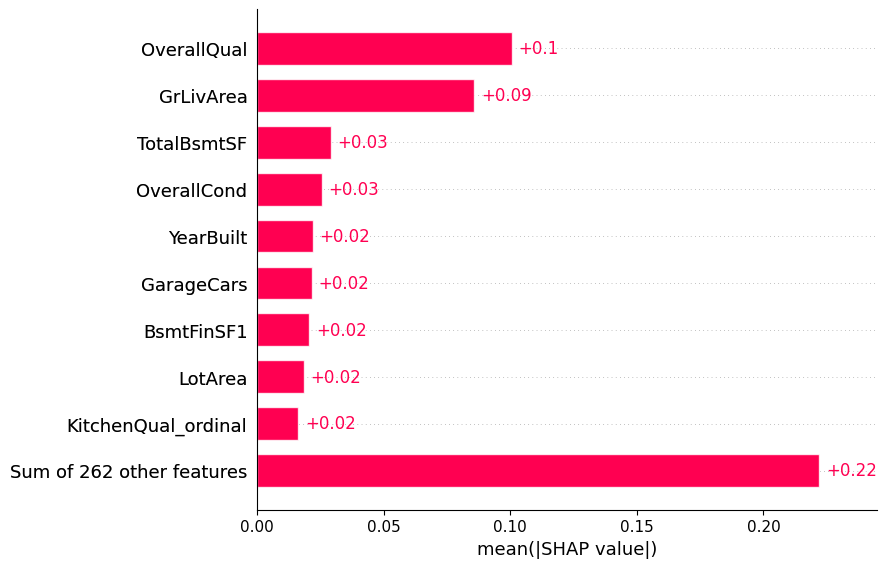

In [87]:
import shap
# Criar objeto SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plotar a importância das variáveis
shap.plots.bar(shap_values)

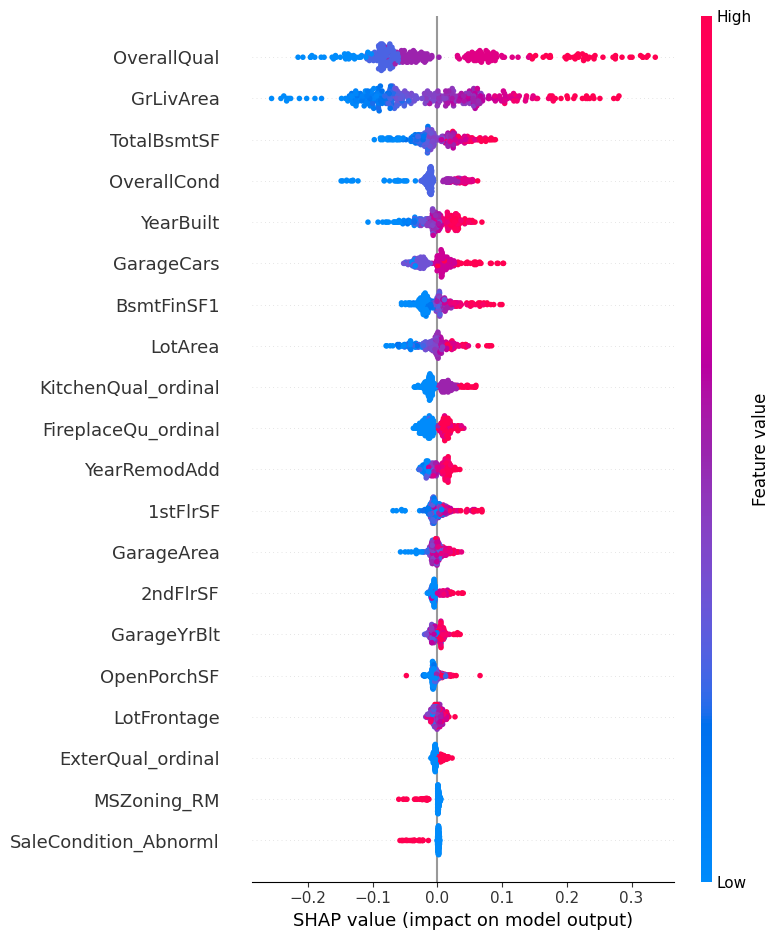

In [88]:
shap.summary_plot(shap_values, X_test)

In [89]:
# Calcular importância média absoluta dos valores SHAP
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Criar DataFrame com nome e importância
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': shap_importance
})

# Ordenar da mais importante para a menos importante
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Printar só os nomes das features mais importantes (ex: top 20)
print("Principais features que influenciam o preço da casa:")
print(importance_df['feature'].head(200).to_list())

Principais features que influenciam o preço da casa:
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'OverallCond', 'YearBuilt', 'GarageCars', 'BsmtFinSF1', 'LotArea', 'KitchenQual_ordinal', 'FireplaceQu_ordinal', 'YearRemodAdd', '1stFlrSF', 'GarageArea', '2ndFlrSF', 'GarageYrBlt', 'OpenPorchSF', 'LotFrontage', 'ExterQual_ordinal', 'MSZoning_RM', 'SaleCondition_Abnorml', 'WoodDeckSF', 'BsmtUnfSF', 'MoSold', 'Foundation_PConc', 'BsmtFullBath', 'CentralAir_encoded', 'Id', 'BsmtFinType1_GLQ', 'GarageType_Detchd', 'BsmtExposure_No', 'YrSold', 'GarageCond_ordinal', 'GarageFinish_Unf', 'Functional_Typ', 'TotRmsAbvGrd', 'GarageType_Attchd', 'LotShape_Reg', 'ScreenPorch', 'BsmtExposure_Gd', 'MasVnrArea', 'Neighborhood_Edwards', 'BsmtQual_Gd', 'Fireplaces', 'Neighborhood_BrkSide', 'BsmtCond_Fa', 'BsmtFinType1_ALQ', 'LandContour_Bnk', 'LandContour_Lvl', 'BsmtQual_TA', 'BedroomAbvGr', 'Neighborhood_OldTown', 'HeatingQC_ordinal', 'Exterior1st_BrkFace', 'Artery', 'Exterior1st_MetalSd', 'Neighborhood_Cr

In [90]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Inicializa o modelo
model_lgb = LGBMRegressor(random_state=42)

# Espaço de busca dos hiperparâmetros
param_dist = {
    'num_leaves': randint(20, 50),
    'max_depth': randint(5, 50),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 500),
    'min_child_samples': randint(5, 20),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Configurando busca aleatória
search = RandomizedSearchCV(
    estimator=model_lgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Executa a busca
search.fit(X_train, y_train)

print("Melhores parâmetros:", search.best_params_)
print("Melhor RMSE (negativo):", search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

In [91]:
best_params = search.best_params_
model_final = LGBMRegressor(**best_params, random_state=42)
model_final.fit(X_train, y_train)

# Previsão e avaliação na escala original
y_pred_log = model_final.predict(X_test)
y_pred = np.expm1(y_pred_log)   # desfaz log para interpretar preco real
y_true = np.expm1(y_test)

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE na escala original: {rmse}')

RMSE na escala original: 27469.865711782928


In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Previsões na escala original
y_pred_log = model_final.predict(X_test)
y_pred = np.expm1(y_pred_log)   # desfaz log para interpretar preço real
y_true = np.expm1(y_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE
mae = mean_absolute_error(y_true, y_pred)

# R²
r2 = r2_score(y_true, y_pred)

# RMSLE (Root Mean Squared Logarithmic Error)
# Como y_true e y_pred já estão na escala original e >0 devido np.expm1,
# podemos calcular RMSLE assim:

rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# MAPE (cuidado com zeros em y_true)
# Vamos evitar divisão por zero com uma pequena correção (epsilon)
epsilon = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Mostrar resultados
print(f'RMSE na escala original: {rmse:.4f}')
print(f'MAE na escala original: {mae:.4f}')
print(f'R² na escala original: {r2:.4f}')
print(f'RMSLE: {rmsle:.4f}')
print(f'MAPE (em %): {mape:.4f}')


RMSE na escala original: 27469.8657
MAE na escala original: 15785.3635
R² na escala original: 0.9016
RMSLE: 0.1364
MAPE (em %): 9.2841


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Previsões na escala original
y_pred_log = model_final.predict(X_test)
y_pred = np.expm1(y_pred_log)   # desfaz log para interpretar preço real
y_true = np.expm1(y_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE
mae = mean_absolute_error(y_true, y_pred)

# R²
r2 = r2_score(y_true, y_pred)

# RMSLE (Root Mean Squared Logarithmic Error)
# Como y_true e y_pred já estão na escala original e >0 devido np.expm1,
# podemos calcular RMSLE assim:

rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# MAPE (cuidado com zeros em y_true)
# Vamos evitar divisão por zero com uma pequena correção (epsilon)
epsilon = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Mostrar resultados
print(f'RMSE na escala original: {rmse:.4f}')
print(f'MAE na escala original: {mae:.4f}')
print(f'R² na escala original: {r2:.4f}')
print(f'RMSLE: {rmsle:.4f}')
print(f'MAPE (em %): {mape:.4f}')


RMSE na escala original: 27469.8657
MAE na escala original: 15785.3635
R² na escala original: 0.9016
RMSLE: 0.1364
MAPE (em %): 9.2841


In [94]:
media_preco = df_train['SalePrice'].mean()
print(f"Média dos preços no dataset: R$ {media_preco:.2f}")

print(f"RMSE / média: {rmse / media_preco:.2%}")
print(f"MAE / média: {mae / media_preco:.2%}")

Média dos preços no dataset: R$ 180921.20
RMSE / média: 15.18%
MAE / média: 8.72%


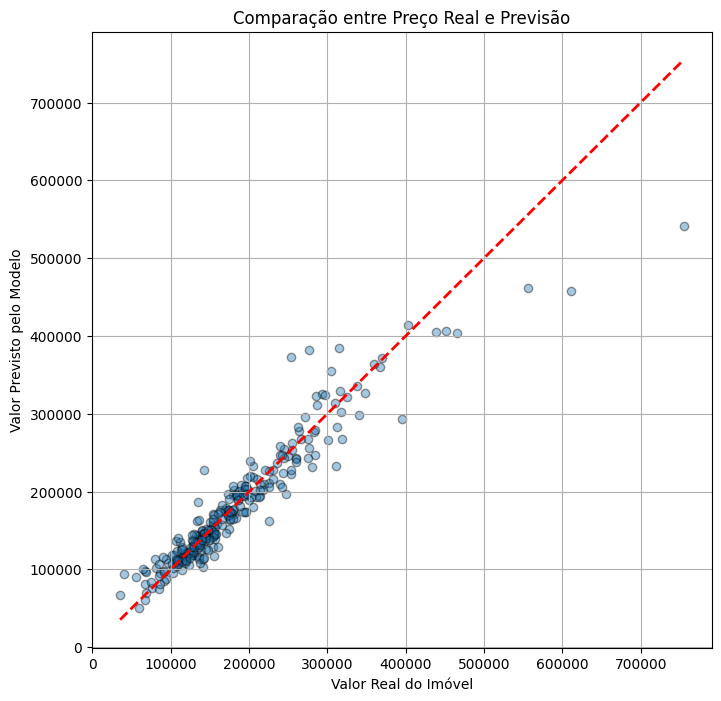

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# y_true e y_pred na escala original (ex: após np.expm1)
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.4, edgecolor='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # linha diagonal y=x
plt.xlabel('Valor Real do Imóvel')
plt.ylabel('Valor Previsto pelo Modelo')
plt.title('Comparação entre Preço Real e Previsão')
plt.grid(True)
plt.show()

### Avaliação

In [107]:
# Importar os dados para treino do Kaggle
df_clear_test = pd.read_csv('df_clear_test.csv')

In [109]:
import pandas as pd

# Supondo que você já tenha o modelo treinado chamado 'model'
# e o DataFrame de teste 'df_clear_test' carregado

# Seleciona as features (removendo colunas que não são input do modelo)
X_test = df_clear_test.drop(['SalePrice'], axis=1, errors='ignore')

# Faz as previsões do modelo
sale_price_pred = model.predict(X_test)

# Cria o DataFrame de submissão
# Presumo que o df_clear_test tenha a coluna 'Id' para identificação
submission = pd.DataFrame({
    'Id': df_clear_test['Id'],              # Identificador de cada entrada
    'SalePrice': sale_price_pred            # Predição do modelo
})

# Salva arquivo CSV sem o índice, pronto para submissão no Kaggle
submission.to_csv('submission.csv', index=False)

print("Arquivo submission.csv criado com sucesso!")

[LightGBM] [Fatal] The number of features in data (264) is not the same as it was in training data (271).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.


LightGBMError: The number of features in data (264) is not the same as it was in training data (271).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.